# Real Estate Housing - Price prediction Model for Nigerian Market

In [80]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [82]:
path = "./data/houses/*.csv" 

csv_files = glob.glob(path)

df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

print(df.isnull().sum())

title            0
price            0
property type    0
location         0
size             0
status           0
type             0
date             0
dtype: int64


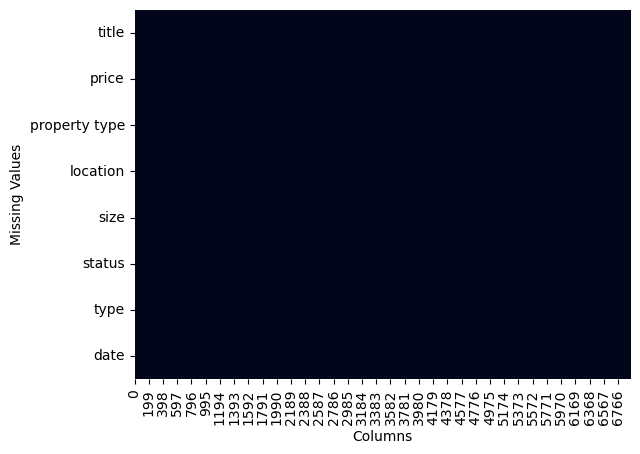

In [84]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(),cbar=False, ax=ax)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.show()

In [85]:
from datetime import date
current_date = date.today()
year_int = current_date.year
print(year_int)

2025


In [86]:
df['price'] = df['price'].str.replace("NGN", "").str.replace(",", "").str.strip().astype(int)
df['date'] = df['date'].astype(str)
df['date'] = df['date'].str.extract(r'(\d{1,2}[a-z]{2} \w+ \d{4})')
df['date'] = df['date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['date'] = pd.to_datetime(df['date'], format='%d %B %Y', errors='coerce')

df['year'] = df['date'].dt.year

df.head()

,title,price,property type,location,size,status,type,date,year
0,4 bedroom serviced terrace duplex in Jahi,8000000,The MLS Properties,"Jahi , Abuja, Abuja FCT",bd4,Active,For Rent,2023-08-09,2023
1,Tastefully finished 3 Bedroom Apartment in Jahi,3000000,The MLS Properties,"Jahi, Abuja, Abuja FCT",bd3,Active,For Rent,2022-11-21,2022
2,5 bedroom semi detached duplex with bq houses ...,17500000,The MLS Properties,"Jahi, Abuja, Abuja FCT",bd5,Active,For Rent,2025-02-12,2025
3,3 Bedroom Terrace Duplex with BQ,6000000,The MLS Properties,"Kabusa Garden, Abuja, Abuja FCT",bd3,Active,For Rent,2025-02-27,2025
4,3 bedrooms apartment Houses for rent in Abuja,3000000,The MLS Properties,"Kubwa express, Abuja, Abuja FCT",bd3,Active,For Rent,2025-02-26,2025


In [90]:
df['age_of_house'] = year_int - df['year']
df.head()

,title,price,property type,location,size,status,type,date,year,age_of_house
0,4 bedroom serviced terrace duplex in Jahi,8000000,The MLS Properties,"Jahi , Abuja, Abuja FCT",bd4,Active,For Rent,2023-08-09,2023,2
1,Tastefully finished 3 Bedroom Apartment in Jahi,3000000,The MLS Properties,"Jahi, Abuja, Abuja FCT",bd3,Active,For Rent,2022-11-21,2022,3
2,5 bedroom semi detached duplex with bq houses ...,17500000,The MLS Properties,"Jahi, Abuja, Abuja FCT",bd5,Active,For Rent,2025-02-12,2025,0
3,3 Bedroom Terrace Duplex with BQ,6000000,The MLS Properties,"Kabusa Garden, Abuja, Abuja FCT",bd3,Active,For Rent,2025-02-27,2025,0
4,3 bedrooms apartment Houses for rent in Abuja,3000000,The MLS Properties,"Kubwa express, Abuja, Abuja FCT",bd3,Active,For Rent,2025-02-26,2025,0


In [92]:
df['size'] = df['size'].astype(str)
df['size'] = df['size'].str.replace("bd", "")     
df['size'] = df['size'].replace({'': None}).astype(float).fillna(0).astype(int)
df['size'] = df['size'].apply(lambda x: 0 if x > 10 else x)
df.head()

,title,price,property type,location,size,status,type,date,year,age_of_house
0,4 bedroom serviced terrace duplex in Jahi,8000000,The MLS Properties,"Jahi , Abuja, Abuja FCT",4,Active,For Rent,2023-08-09,2023,2
1,Tastefully finished 3 Bedroom Apartment in Jahi,3000000,The MLS Properties,"Jahi, Abuja, Abuja FCT",3,Active,For Rent,2022-11-21,2022,3
2,5 bedroom semi detached duplex with bq houses ...,17500000,The MLS Properties,"Jahi, Abuja, Abuja FCT",5,Active,For Rent,2025-02-12,2025,0
3,3 Bedroom Terrace Duplex with BQ,6000000,The MLS Properties,"Kabusa Garden, Abuja, Abuja FCT",3,Active,For Rent,2025-02-27,2025,0
4,3 bedrooms apartment Houses for rent in Abuja,3000000,The MLS Properties,"Kubwa express, Abuja, Abuja FCT",3,Active,For Rent,2025-02-26,2025,0


In [94]:
import re

def clean_location(value):
    match = re.match(r"(.+?)\s*\((.*?)\),?\s*(.+)", value)
    if match:
        return f"{match.group(3)}, {match.group(1)}"
    return value

# Apply cleaning functions
df["location"] = df["location"].apply(clean_location)

In [98]:
def clean_location(location):
    if pd.isna(location):
        return np.nan  
    stripped = location.lstrip()
    
    if stripped and not (stripped.startswith('#') or stripped[0].isdigit()):
        return location  
    else:
        return np.nan

df["cleaned_location"] = df["location"].apply(clean_location)
df = df.dropna(subset=["cleaned_location"])

In [100]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: title
['4 bedroom serviced terrace duplex in Jahi'
 'Tastefully finished 3 Bedroom Apartment in Jahi'
 '5 bedroom semi detached duplex with bq houses for rent in ab...'
 '3 Bedroom Terrace Duplex with BQ'
 '3 bedrooms apartment Houses for rent in Abuja'
 '3  Bedroom Terrace Duplex'
 'Stand Alone 4 Bedroom Bungalow Apartment Houses for rent in...'
 'NEWLY BUILT 4 BEDROOM APARTMENT IN GALADIMAWA'
 'STANDARD 3 BEDROOM APARTMENT HOUSES FOR RENT IN ABUJA AT KAT...'
 'BRAND NEW 12 UNITS OF 3,2,1 BEDROOMS FOR COORPERATE LEASE HO...'
 'Newly built 4bedroom fully detached duplex'
 'BRAND NEW 12 UNITS OF 3,2,1 BEDROOMS FOR COORPERATE LEASE'
 'Spacious 3 Bedroom Apartment'
 'Finely Furnished 2 Bedroom Flat Apartment'
 'Spacious 3 Bedroom Flat Apartment' 'Furnished 2 Bedroom Flat Apartment'
 'EXCLUSIVE 4 BEDROOM TERRACED DUPLEX' 'BEAUTIFUL 2 BEDROM APARTMENT'
 '5 Bedroom Semi Detached Terrace Duplex'
 'Brand New 5 Bedroom Duplex with detached BQ'
 '4 Bedroom Terrace with 1 BQ' '3 bedroom b

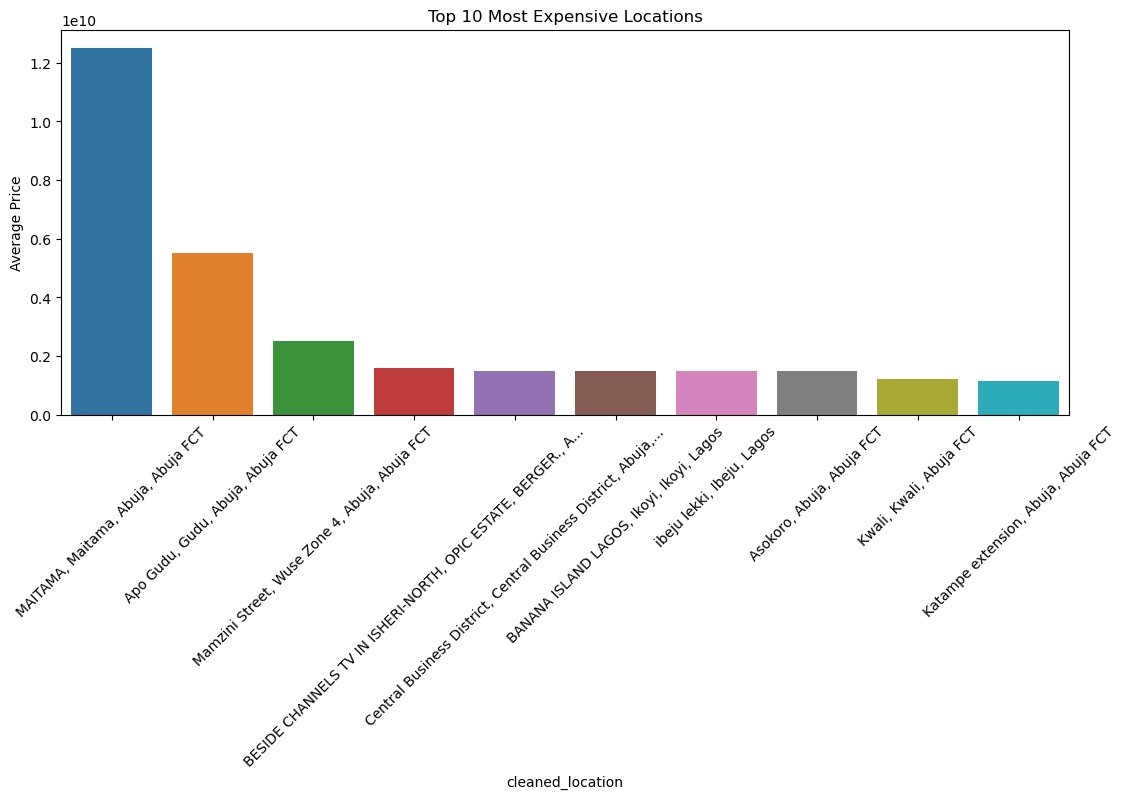

In [102]:
# Shows only the most expensive locations
top_locations = df.groupby("cleaned_location")["price"].mean().sort_values(ascending=False).head(10)

# Plot the top 10 locations
plt.figure(figsize=(13, 5))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.title("Top 10 Most Expensive Locations")
plt.ylabel("Average Price")
plt.show()

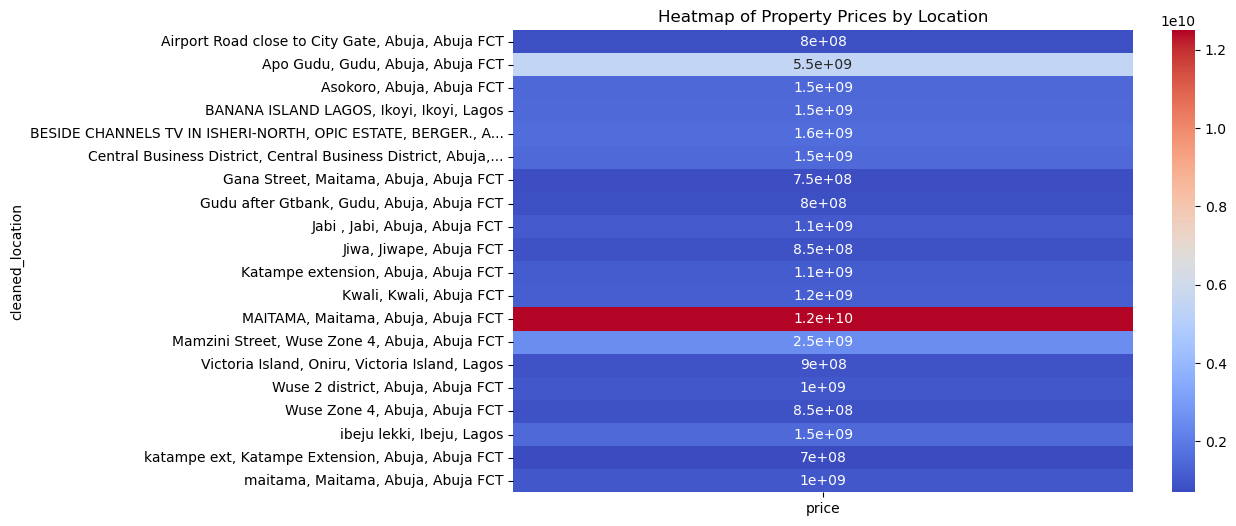

In [106]:
#Visually compares locations without clutter for clear comparison

location_prices = df.groupby("cleaned_location")["price"].mean().reset_index()

# Sort and take top 20 locations
top_20 = location_prices.sort_values("price", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.heatmap(top_20.pivot_table(index="cleaned_location", values="price"), cmap="coolwarm", annot=True)
plt.title("Heatmap of Property Prices by Location")
plt.show()

In [108]:
df["size"] = pd.to_numeric(df["size"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df.dropna(subset=["size", "price"], inplace=True)
df["size"] = df["size"].replace({'': None}).astype(float).fillna(0).astype(int)

                                      cleaned_location  age_of_house  \
0                  ACO , Lugbe Abuja, Abuja, Abuja FCT           1.0   
1                          ACO Lugbe, Abuja, Abuja FCT           1.0   
2    AFTER KADO FISH MARKET, Life Camp, Abuja, Abuj...           3.0   
3                       AJAH ,LAGOS, Ajah, Ajah, Lagos           4.0   
4                       AJAH, LAGOS, Ajah, Ajah, Lagos           4.0   
..                                                 ...           ...   
703                    wasa/Apo, Apo, Abuja, Abuja FCT           3.0   
704                  wuse 2, Wuse II, Abuja, Abuja FCT           3.0   
705                   wuse 2, wuse 2, Abuja, Abuja FCT           2.0   
706                    wuse, Wuse II, Abuja, Abuja FCT           1.0   
707                             wuye, Abuja, Abuja FCT           3.5   

         size         price  
0    0.000000  7.000000e+06  
1    3.000000  5.500000e+06  
2    0.000000  1.700000e+07  
3    4.000000  

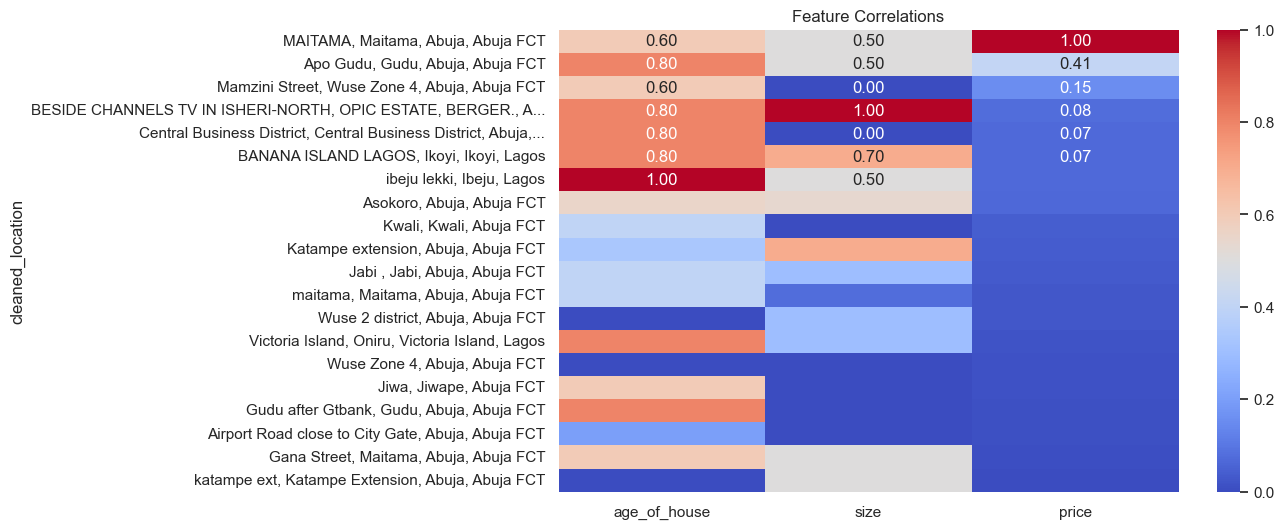

In [120]:
#To check if sqm or bedrooms correlate with price? or any features redundant?

columns_of_interest = ['age_of_house', 'size', 'price', 'cleaned_location']

df_selected = df[columns_of_interest]

# correlation_matrix = final_df[columns_of_interest].corr(method='spearman')

df_grouped = df_selected.groupby("cleaned_location").mean().reset_index()

print(df_grouped)

top_locations = df_grouped.sort_values("price", ascending=False).head(20)

top_locations.set_index("cleaned_location", inplace=True)

top_locations_normalized = (top_locations - top_locations.min()) / (top_locations.max() - top_locations.min())

sns.set_theme(style='white')
plt.figure(figsize=(10, 6))
sns.heatmap(top_locations_normalized, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


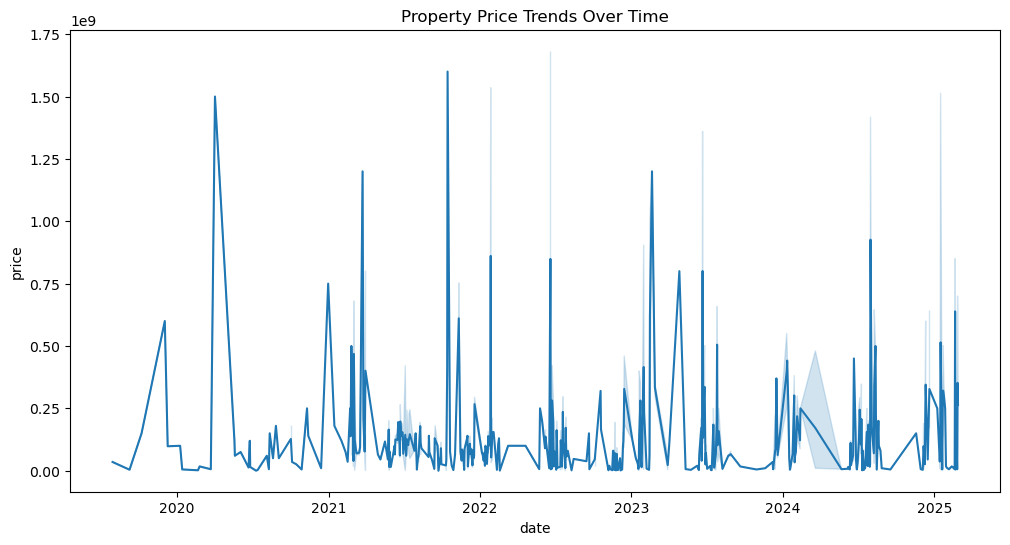

In [17]:
#to check if prices increasing over time?

df["date"] = pd.to_datetime(df["date"]) 

plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="price", data=df)
plt.title("Property Price Trends Over Time")
plt.show()

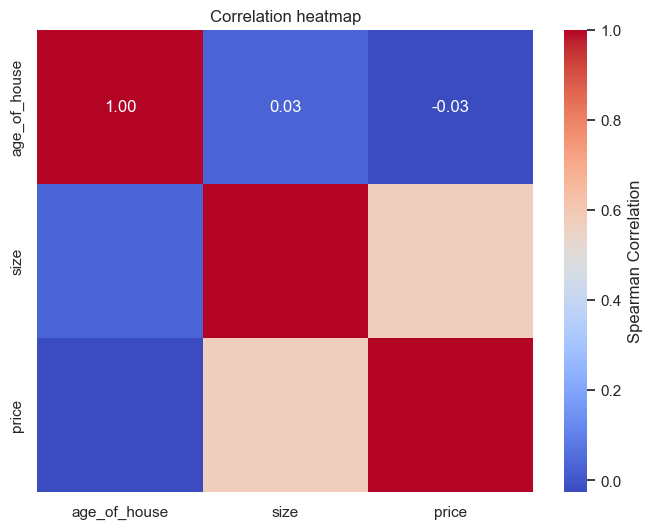

In [545]:
columns_of_interest = ['age_of_house', 'size', 'price']
correlation_matrix = df[columns_of_interest].corr(method="spearman")
sns.set_theme(style='white')
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt = ".2f", cmap="coolwarm", cbar_kws={"label": "Spearman Correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

<Axes: >

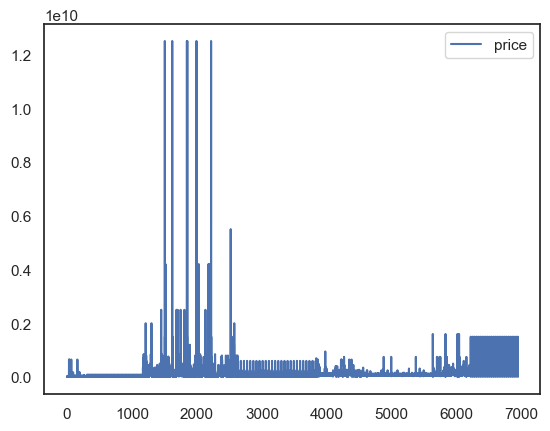

In [577]:
df.plot.line(y='price', use_index=True)

In [559]:
df['location'] = df['location'].astype(str)
df['location'].value_counts().reset_index().sort_values("count", ascending=False)


,location,count
0,"ikota,lekki, Lekki, Lekki, Lagos",576
1,"Ikota, Lekki, Lagos",420
2,"Maitama, Abuja, Abuja FCT",340
3,"Lugbe, Abuja, Abuja FCT",306
4,"lugbe, Lugbe, Abuja, Abuja FCT",285
...,...,...
435,"BESIDE CHANNELS TV IN ISHERI-NORTH, OPIC ESTAT...",1
434,"Eleko Junction Ibeko, Lekki, Lagos",1
433,"Ibeju, Lekki, Lagos",1
432,"Abijo GRA, Ikeja, Lagos",1


In [ ]:
# Convert date column if available
df["date"] = pd.to_datetime(df["date"])

# Trend analysis
plt.figure(figsize=(10, 5))
sns.lineplot(x="date", y="converted_prices", data=df)
plt.title("Price Trends Over Time")
plt.show()

In [575]:
df['words_in_location'] = df['location'].str.split().str.len()
df.loc[df['words_in_location'].between(1, 4), 'location']

1          Jahi, Abuja, Abuja FCT
2          Jahi, Abuja, Abuja FCT
15      Katampe, Abuja, Abuja FCT
23         Wuye, Abuja, Abuja FCT
24         Wuye, Abuja, Abuja FCT
                  ...            
6936          ikota, Lekki, Lagos
6937          iKOTA, Lekki, Lagos
6938          Ikota, Lekki, Lagos
6939          IKota, Lekki, Lagos
6940    ibeju lekki, Ibeju, Lagos
Name: location, Length: 3998, dtype: object

In [377]:
df['type'] = df['type'].astype(str)

In [379]:
print(df.dtypes)

title                    object
price                     int64
property type            object
location                 object
size                      int64
status                   object
type                     object
date             datetime64[ns]
dtype: object


In [315]:
df_selected = df[['price', 'location', 'size', 'type', 'date']]
df_selected.head()

,price,location,size,type,date
0,8000000,"Jahi , Abuja, Abuja FCT",4,For Rent,2023-08-09
1,3000000,"Jahi, Abuja, Abuja FCT",3,For Rent,2022-11-21
2,17500000,"Jahi, Abuja, Abuja FCT",5,For Rent,2025-02-12
3,6000000,"Kabusa Garden, Abuja, Abuja FCT",3,For Rent,2025-02-27
4,3000000,"Kubwa express, Abuja, Abuja FCT",3,For Rent,2025-02-26


#### considering location, size, type, date to predict prices

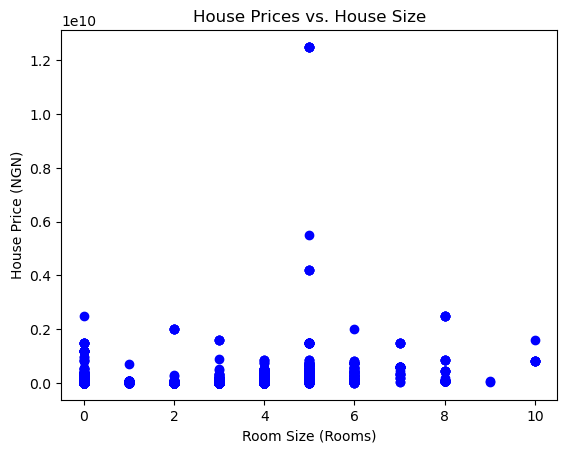

In [305]:
# Visualize the data
plt.scatter(df_selected['size'], df_selected['price'], marker ='o', color ='blue')
plt.title('House Prices vs. House Size')
plt.xlabel('Room Size (Rooms)')
plt.ylabel('House Price (NGN)')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


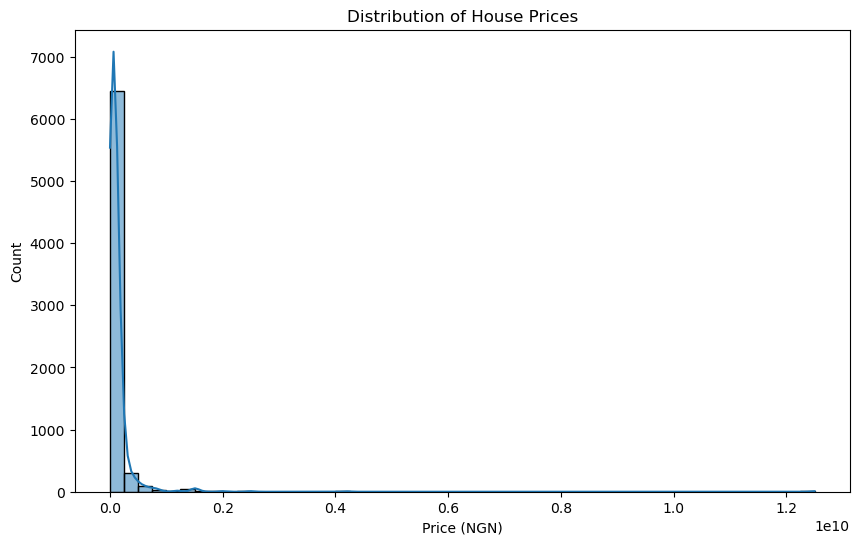

In [387]:
plt.figure(figsize=(10, 6))
sns.histplot(df_selected['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price (NGN)")
plt.show()

In [389]:
print(df_selected['price'].isnull().sum())

0
